# Secom Dosyası Üzerinden İşlemler

**Data Manipulasyonu yapılacak**

_Let's Begin_


\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as p
import sys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("/home/elci/predy/PredY/secom/data/Secom_csv.csv") 

In [5]:
df.head(10)

,Unnamed: 0,Fail,Tarih,X1,X2,X3,X4,X5,X6,X7,...,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590
0,1,0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2,0,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4,0,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5,0,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,6,0,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,7,0,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,8,0,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,9,0,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,10,0,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [6]:
df.describe()

,Unnamed: 0,Fail,X1,X2,X3,X4,X5,X6,X7,X8,...,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590
count,1567.00000,1567.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,784.00000,0.066369,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,452.49825,0.249005,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,1.00000,0.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,392.50000,0.000000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,784.00000,0.000000,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,1175.50000,0.000000,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,1567.00000,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [7]:
df['Fail'].value_counts()

0    1463
1     104
Name: Fail, dtype: int64

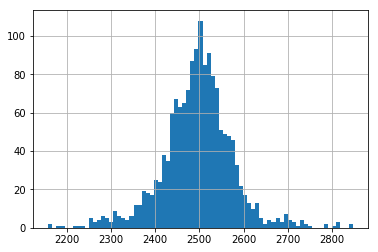

In [8]:
df['X2'].hist(bins=75)

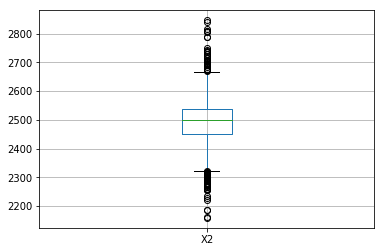

In [9]:
df.boxplot(column='X2')

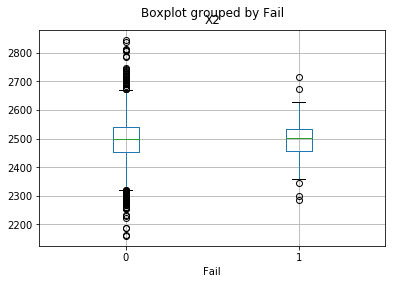

In [10]:
df.boxplot(column='X2', by = 'Fail')

In [11]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0      0
Fail            0
Tarih           0
X1              6
X2              7
X3             14
X4             14
X5             14
X6             14
X7             14
X8              9
X9              2
X10             2
X11             2
X12             2
X13             2
X14             3
X15             3
X16             3
X17             3
X18             3
X19             3
X20            10
X21             0
X22             2
X23             2
X24             2
X25             2
X26             2
X27             2
             ... 
X561            1
X562            1
X563          273
X564          273
X565          273
X566          273
X567          273
X568          273
X569          273
X570          273
X571            0
X572            0
X573            0
X574            0
X575            0
X576            0
X577            0
X578            0
X579          949
X580          949
X581          949
X582          949
X583            1
X584            1
X585      

In [12]:
len(df.columns)

593

In [13]:
count = 0
n=1
threshold_value=250

In [14]:
dff=df

**Threshold sayısından daha az NA içeren parametreler tutulduğu fonksiyon**

In [15]:
try:

    while (count < len(df.columns)-n-1):
        sys.stdout.write("-")
        if (dff.apply(lambda x: sum(x.isnull()),axis=0)[count] > threshold_value):
            print ("\n",count+n-1,'.değişken atıldı  ',"içerdiği na sayısı=",dff.apply(lambda x: sum(x.isnull()),axis=0)[count],"    toplamda atılan değişken sayısı=",n)
            dff=dff.drop(dff.columns[count],axis=1)
            n=n+1           
            count-= 1
        count= count + 1
except:
    print("out of bound ")    


----------------------------------------------------------------------------
 75 .değişken atıldı   içerdiği na sayısı= 794     toplamda atılan değişken sayısı= 1
-
 76 .değişken atıldı   içerdiği na sayısı= 794     toplamda atılan değişken sayısı= 2
------------
 88 .değişken atıldı   içerdiği na sayısı= 1341     toplamda atılan değişken sayısı= 3
------------------------
 112 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 4
-
 113 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 5
-
 114 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 6
-
 115 .değişken atıldı   içerdiği na sayısı= 715     toplamda atılan değişken sayısı= 7
---------------------------------------------
 160 .değişken atıldı   içerdiği na sayısı= 1429     toplamda atılan değişken sayısı= 8
-
 161 .değişken atıldı   içerdiği na sayısı= 1429     toplamda atılan değişken sayısı= 9
-------------------------------------------

In [16]:
count

539

In [17]:
dff.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0     0
Fail           0
Tarih          0
X1             6
X2             7
X3            14
X4            14
X5            14
X6            14
X7            14
X8             9
X9             2
X10            2
X11            2
X12            2
X13            2
X14            3
X15            3
X16            3
X17            3
X18            3
X19            3
X20           10
X21            0
X22            2
X23            2
X24            2
X25            2
X26            2
X27            2
              ..
X537           9
X538           9
X539           9
X540           8
X541           8
X542           8
X543           2
X544           2
X545           2
X546           2
X559           1
X560           1
X561           1
X562           1
X571           0
X572           0
X573           0
X574           0
X575           0
X576           0
X577           0
X578           0
X583           1
X584           1
X585           1
X586           1
X587           1
X588          

In [18]:
dff

,Unnamed: 0,Fail,Tarih,X1,X2,X3,X4,X5,X6,X7,...,X577,X578,X583,X584,X585,X586,X587,X588,X589,X590
0,1,0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2,0,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4,0,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5,0,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,6,0,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,...,1.6679,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,7,0,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,...,1.1958,8.3645,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,8,0,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,...,56.4274,16.0862,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,9,0,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,...,1.3248,14.2892,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,10,0,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.6636,7.4181,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


**Değişken tipi için**
**Parametrelerin rölatif unique değerleri hesaplanıyor**

**THRESHOLD Gerekli**

In [19]:
i=2
Threshold=0

In [20]:
dropped=dff.dropna()
dropped

,Unnamed: 0,Fail,Tarih,X1,X2,X3,X4,X5,X6,X7,...,X577,X578,X583,X584,X585,X586,X587,X588,X589,X590
1,2,0,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4,0,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5,0,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,6,0,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,...,1.6679,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,7,0,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,...,1.1958,8.3645,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,8,0,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,...,56.4274,16.0862,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,9,0,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,...,1.3248,14.2892,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,10,0,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.6636,7.4181,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294
10,11,1,2008-07-19 21:57:00,2994.05,2548.21,2195.1222,1046.1468,1.3204,100.0,103.3400,...,1.7983,14.5507,0.4925,0.0158,0.0041,3.2115,0.0355,0.0205,0.0071,57.8122


In [21]:
a=[dropped.columns]
a[0]

Index(['Unnamed: 0', 'Fail', 'Tarih', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
       ...
       'X577', 'X578', 'X583', 'X584', 'X585', 'X586', 'X587', 'X588', 'X589',
       'X590'],
      dtype='object', length=541)

In [22]:
dictionary={}
dictionary

{}

In [23]:
for i in range(0,len(dropped.columns)):
    dictionary[a[0][i]]=len(set(dropped.iloc[:,i]))/len(dropped.iloc[:,i])


In [24]:
for k, v in dictionary.items():
    print (k + ' rölatif frekansı= ' + str(v))

Unnamed: 0 rölatif frekansı= 1.0
Fail rölatif frekansı= 0.0014357501794687725
Tarih rölatif frekansı= 0.9827709978463748
X1 rölatif frekansı= 0.9763101220387652
X2 rölatif frekansı= 0.9698492462311558
X3 rölatif frekansı= 0.34673366834170855
X4 rölatif frekansı= 0.3539124192390524
X5 rölatif frekansı= 0.3431442928930366
X6 rölatif frekansı= 0.0007178750897343862
X7 rölatif frekansı= 0.34816941852117733
X8 rölatif frekansı= 0.06317300789662599
X9 rölatif frekansı= 0.791816223977028
X10 rölatif frekansı= 0.3912419239052405
X11 rölatif frekansı= 0.2742282842785355
X12 rölatif frekansı= 0.26776740847092606
X13 rölatif frekansı= 0.9913854989231874
X14 rölatif frekansı= 0.0007178750897343862
X15 rölatif frekansı= 0.9956927494615937
X16 rölatif frekansı= 0.9985642498205313
X17 rölatif frekansı= 0.9526202440775305
X18 rölatif frekansı= 0.19885139985642497
X19 rölatif frekansı= 0.9921033740129217
X20 rölatif frekansı= 0.24192390524048815
X21 rölatif frekansı= 0.3840631730078966
X22 rölatif frek

In [25]:
threshold_rolative=0.20

**Rölatif Frekansı Threshold Değerinden Küçük Olan Her Sütunu Bastır.**

for k, v in dictionary.items():
    if v<threshold_rolative:
        print(dropped[k])

In [26]:
for k, v in dictionary.items():
    if v<threshold_rolative:
        dropped[k]=dropped[k].astype('category')

/home/elci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
kategorik_değişkenli_data=dropped.select_dtypes(include=['category'])

In [28]:
float_degiskenli_data=dropped.select_dtypes(include=['float'])
float_degiskenli_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 1 to 1550
Columns: 331 entries, X1 to X590
dtypes: float64(331)
memory usage: 3.5 MB


In [29]:
print("kategorik degisken sayısı=",len(kategorik_değişkenli_data.columns),"\nfloat degisken sayısı=",len(float_degiskenli_data.columns),"\nToplam eğişken sayısı=",len(dropped.columns))

kategorik degisken sayısı= 208 
float degisken sayısı= 331 
Toplam eğişken sayısı= 541


In [30]:
hedef_fail=kategorik_değişkenli_data.iloc[:,0]

In [31]:
kategorik_değişkenli_data.drop(["Fail"],axis=1)

,X6,X8,X14,X18,X30,X41,X43,X50,X53,X54,...,X539,X543,X544,X545,X546,X583,X584,X585,X588,X589
1,100.0,0.1247,0.0,0.9701,2.2667,78.250,70.0,1.0,0.0,4.590,...,0.0,0.1096,0.0078,0.0026,7.1160,0.5019,0.0223,0.0055,0.0201,0.0060
2,100.0,0.1241,0.0,0.9674,2.3333,14.370,70.0,1.0,0.0,4.486,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4958,0.0157,0.0039,0.0484,0.0148
3,100.0,0.1217,0.0,0.9687,2.6444,76.900,70.0,1.0,0.0,4.486,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4990,0.0103,0.0025,0.0149,0.0044
4,100.0,0.1235,0.0,0.9735,3.1556,76.390,70.0,1.0,0.0,4.624,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4800,0.4766,0.1045,0.0149,0.0044
5,100.0,0.1235,0.0,0.9747,1.6333,59.940,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4949,0.0189,0.0044,0.0151,0.0052
6,100.0,0.1247,0.0,0.9667,2.4889,74.460,70.0,1.0,0.0,4.590,...,0.0,0.1096,0.0078,0.0026,7.1160,0.5010,0.0143,0.0042,0.0151,0.0052
7,100.0,0.1185,0.0,0.9687,2.7889,78.090,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4984,0.0106,0.0034,0.0194,0.0063
8,100.0,0.1185,0.0,0.9693,2.1444,61.100,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4993,0.0172,0.0046,0.0124,0.0045
9,100.0,0.1185,0.0,0.9667,2.3778,78.090,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4967,0.0152,0.0038,0.0191,0.0073
10,100.0,0.1223,0.0,0.9664,1.9444,14.370,70.0,1.0,0.0,4.647,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4925,0.0158,0.0041,0.0205,0.0071


In [32]:
float_degiskenli_data

,X1,X2,X3,X4,X5,X7,X9,X10,X11,X12,...,X572,X573,X574,X575,X576,X577,X578,X586,X587,X590
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,1.4966,-0.0005,-0.0148,0.9627,...,2.4335,5.9200,0.2653,2.0111,0.0772,1.1065,10.9003,4.4447,0.0096,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,1.4436,0.0041,0.0013,0.9615,...,2.0293,11.2100,0.1882,4.0923,0.0640,2.0952,9.2721,3.1745,0.0584,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,1.4882,-0.0124,-0.0033,0.9629,...,2.0253,9.3300,0.1738,2.8971,0.0525,1.7585,8.5831,2.0544,0.0202,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,1.5031,-0.0031,-0.0072,0.9569,...,2.0275,8.8300,0.2224,3.1776,0.0706,1.6597,10.9698,99.3032,0.0202,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,1.5287,0.0167,0.0055,0.9699,...,2.3236,8.9100,0.3201,2.2598,0.0899,1.6679,13.7755,3.8276,0.0342,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,102.3433,1.5816,-0.0270,0.0105,0.9591,...,2.4229,6.4800,0.2027,2.2019,0.0597,1.1958,8.3645,2.8515,0.0342,44.0077
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,106.2400,1.5153,0.0157,0.0007,0.9481,...,2.2008,278.1900,0.3540,92.5866,0.1260,56.4274,16.0862,2.1261,0.0204,95.0310
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,106.2400,1.5358,0.0111,-0.0066,0.9494,...,2.2170,7.0900,0.3168,2.4902,0.0878,1.3248,14.2892,3.4456,0.0111,111.6525
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,106.2400,1.5381,0.0159,0.0049,0.9440,...,2.2598,3.5400,0.1676,1.0395,0.0485,0.6636,7.4181,3.0687,0.0212,90.2294
10,2994.05,2548.21,2195.1222,1046.1468,1.3204,103.3400,1.5144,-0.0190,0.0013,0.9433,...,1.8715,9.5699,0.2723,3.3618,0.0862,1.7983,14.5507,3.2115,0.0355,57.8122


In [33]:
floatlı_outlierssız_data=float_degiskenli_data
floatlı_outlierssız_data

,X1,X2,X3,X4,X5,X7,X9,X10,X11,X12,...,X572,X573,X574,X575,X576,X577,X578,X586,X587,X590
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,1.4966,-0.0005,-0.0148,0.9627,...,2.4335,5.9200,0.2653,2.0111,0.0772,1.1065,10.9003,4.4447,0.0096,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,1.4436,0.0041,0.0013,0.9615,...,2.0293,11.2100,0.1882,4.0923,0.0640,2.0952,9.2721,3.1745,0.0584,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,1.4882,-0.0124,-0.0033,0.9629,...,2.0253,9.3300,0.1738,2.8971,0.0525,1.7585,8.5831,2.0544,0.0202,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,1.5031,-0.0031,-0.0072,0.9569,...,2.0275,8.8300,0.2224,3.1776,0.0706,1.6597,10.9698,99.3032,0.0202,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,1.5287,0.0167,0.0055,0.9699,...,2.3236,8.9100,0.3201,2.2598,0.0899,1.6679,13.7755,3.8276,0.0342,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,102.3433,1.5816,-0.0270,0.0105,0.9591,...,2.4229,6.4800,0.2027,2.2019,0.0597,1.1958,8.3645,2.8515,0.0342,44.0077
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,106.2400,1.5153,0.0157,0.0007,0.9481,...,2.2008,278.1900,0.3540,92.5866,0.1260,56.4274,16.0862,2.1261,0.0204,95.0310
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,106.2400,1.5358,0.0111,-0.0066,0.9494,...,2.2170,7.0900,0.3168,2.4902,0.0878,1.3248,14.2892,3.4456,0.0111,111.6525
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,106.2400,1.5381,0.0159,0.0049,0.9440,...,2.2598,3.5400,0.1676,1.0395,0.0485,0.6636,7.4181,3.0687,0.0212,90.2294
10,2994.05,2548.21,2195.1222,1046.1468,1.3204,103.3400,1.5144,-0.0190,0.0013,0.9433,...,1.8715,9.5699,0.2723,3.3618,0.0862,1.7983,14.5507,3.2115,0.0355,57.8122


In [34]:
from ipywidgets import FloatProgress
from IPython.display import display
i

540

###                                               Outlier 'lar atılıyor.

i=0
f = FloatProgress(min=0, max=len(floatlı_outlierssız_data.columns))
f1= FloatProgress(min=0,max=len(floatlı_outlierssız_data))
display(f)
f.description="sütun"
f1.description="satır"
f1.bar_style="danger"
display(f1)
for j in range(0,len(floatlı_outlierssız_data.columns)):
    f1.value =0
    f.value += 1
    i=0
    ust_limit=round(np.mean(floatlı_outlierssız_data.iloc[:,j]) + 3*(np.percentile(floatlı_outlierssız_data.iloc[:,j],75)-np.percentile(floatlı_outlierssız_data.iloc[:,j],25)),2)
    alt_limit=round(np.mean(floatlı_outlierssız_data.iloc[:,j]) - 3*(np.percentile(floatlı_outlierssız_data.iloc[:,j],75)-np.percentile(floatlı_outlierssız_data.iloc[:,j],25)),2)
    while i < len(floatlı_outlierssız_data)-1:
       # sys.stdout.write(".")
        
        f1.value += 1
        if (round(floatlı_outlierssız_data.iloc[i,j],2) >ust_limit):
            floatlı_outlierssız_data.drop(floatlı_outlierssız_data.index[i],inplace=True)
            print("\n",i,".deger atıldı+")
            floatlı_outlierssız_data.reset_index()
        if (round(floatlı_outlierssız_data.iloc[i,j],2) <alt_limit):
            floatlı_outlierssız_data.drop(floatlı_outlierssız_data.index[i],inplace=True)
            floatlı_outlierssız_data.reset_index()
            print("\n",i,".deger atıldı-")
        i=i+1

floatlı_outlierssız_data
        

In [69]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 3
force_bin = 3



# define a binning function
def mono_bin(Y, X, n = max_bin):
   
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    
    while np.abs(r) < 1:
        
        

        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
    
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    
    for i in x:
        
        
        
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    print("----")
    iv = iv.reset_index()
    print("----")
    return(iv_df,iv) 

In [70]:
float_woe = pd.concat([float_degiskenli_data,hedef_fail], axis = 1)

In [71]:
#float_woe=float_woe.iloc[0:30,:]
#float_woe=pd.DataFrame(float_woe)


In [72]:
float_woe['target'] = float_woe["Fail"]
float_woe = float_woe.drop('Fail',axis=1)
float_woe['target']=float_woe['target'].astype('int')

In [73]:
final_iv, IV = data_vars(float_woe,float_woe.target)

----
----


In [74]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,X1,2743.2400,3011.8400,698,60,0.085960,638,0.914040,0.606061,0.493045,0.206380,0.051830
1,X1,3012.1800,3356.3500,695,39,0.056115,656,0.943885,0.393939,0.506955,-0.252226,0.051830
2,X2,2158.7500,2498.7700,697,49,0.070301,648,0.929699,0.494949,0.500773,-0.011697,0.000136
3,X2,2498.9100,2846.4400,696,50,0.071839,646,0.928161,0.505051,0.499227,0.011597,0.000136
4,X3,2060.6600,2189.3556,468,39,0.083333,429,0.916667,0.393939,0.331530,0.172478,0.017856
5,X3,2189.5777,2212.3000,461,31,0.067245,430,0.932755,0.313131,0.332303,-0.059424,0.017856
6,X3,2212.7111,2315.2667,464,29,0.062500,435,0.937500,0.292929,0.336167,-0.137677,0.017856
7,X4,0.0000,1285.2144,700,50,0.071429,650,0.928571,0.505051,0.502318,0.005424,0.000030
8,X4,1287.3538,3715.0417,693,49,0.070707,644,0.929293,0.494949,0.497682,-0.005505,0.000030
9,X5,0.6815,1.3076,697,51,0.073171,646,0.926829,0.515152,0.499227,0.031400,0.001015


In [78]:
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
301,X60,4.185608e-01
2,X103,1.554016e-01
272,X511,1.503116e-01
12,X123,1.397370e-01
238,X469,1.320377e-01
156,X34,1.289360e-01
177,X38,1.258021e-01
138,X317,1.256096e-01
118,X29,1.243977e-01
84,X22,1.145234e-01


In [79]:
x=float_degiskenli_data
x = StandardScaler().fit_transform(x)


In [80]:
mean_vec = np.mean(x, axis=0)
cov_mat = (x - mean_vec).T.dot((x - mean_vec)) / (x.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00071839e+00 -1.43909690e-01 -6.44387021e-03 ...  2.72612568e-02
   2.58962934e-02  8.45626882e-03]
 [-1.43909690e-01  1.00071839e+00  1.35428163e-02 ... -9.45413533e-04
  -5.27984298e-03  4.25179899e-02]
 [-6.44387021e-03  1.35428163e-02  1.00071839e+00 ...  1.92759740e-02
  -2.88345190e-02 -3.31701813e-02]
 ...
 [ 2.72612568e-02 -9.45413533e-04  1.92759740e-02 ...  1.00071839e+00
   2.26770079e-03 -5.25584911e-03]
 [ 2.58962934e-02 -5.27984298e-03 -2.88345190e-02 ...  2.26770079e-03
   1.00071839e+00 -4.80866908e-01]
 [ 8.45626882e-03  4.25179899e-02 -3.31701813e-02 ... -5.25584911e-03
  -4.80866908e-01  1.00071839e+00]]


In [81]:
print('NumPy covariance matrix: \n%s' %np.cov(x.T))

NumPy covariance matrix: 
[[ 1.00071839e+00 -1.43909690e-01 -6.44387021e-03 ...  2.72612568e-02
   2.58962934e-02  8.45626882e-03]
 [-1.43909690e-01  1.00071839e+00  1.35428163e-02 ... -9.45413533e-04
  -5.27984298e-03  4.25179899e-02]
 [-6.44387021e-03  1.35428163e-02  1.00071839e+00 ...  1.92759740e-02
  -2.88345190e-02 -3.31701813e-02]
 ...
 [ 2.72612568e-02 -9.45413533e-04  1.92759740e-02 ...  1.00071839e+00
   2.26770079e-03 -5.25584911e-03]
 [ 2.58962934e-02 -5.27984298e-03 -2.88345190e-02 ...  2.26770079e-03
   1.00071839e+00 -4.80866908e-01]
 [ 8.45626882e-03  4.25179899e-02 -3.31701813e-02 ... -5.25584911e-03
  -4.80866908e-01  1.00071839e+00]]


In [82]:
cov_mat = np.cov(x.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-7.04387491e-03  2.53413527e-02 -5.31026090e-03 ...  2.15203665e-06
   1.04158752e-06 -9.89311769e-09]
 [ 1.09248525e-03 -1.25549883e-02 -2.19953186e-03 ...  1.56978440e-06
   1.45298595e-06 -1.31988840e-06]
 [-4.31150740e-03 -6.54239546e-03  1.58558222e-03 ... -7.14847442e-07
   1.31102510e-06  9.94337049e-06]
 ...
 [ 3.48345690e-03 -5.54681614e-03  1.90678815e-03 ...  3.36720145e-08
  -2.17883760e-07 -1.07389581e-06]
 [-7.07675006e-03  1.95282940e-02 -2.09639155e-02 ...  2.78439855e-07
  -3.06670992e-07 -1.51147646e-06]
 [ 1.52885566e-02 -1.64281625e-02 -4.91237837e-03 ... -4.05806719e-08
   6.50064454e-07 -4.40870353e-06]]

Eigenvalues 
[2.44110787e+01 1.45312334e+01 1.20559322e+01 9.91068763e+00
 8.70161405e+00 7.42081513e+00 6.85259898e+00 6.43772288e+00
 6.30645416e+00 5.71758881e+00 5.54178991e+00 5.17321663e+00
 5.19094953e+00 4.73606673e+00 4.41744689e+00 4.35282610e+00
 4.25403037e+00 4.21670483e+00 3.88172168e+00 3.66815201e+00
 3.62254591e+00 3.45973653e+00 

In [83]:
u,s,v = np.linalg.svd(x.T)
u



array([[-7.04387491e-03,  2.53413527e-02, -5.31026090e-03, ...,
         1.04158770e-06,  2.15203700e-06,  3.94634618e-07],
       [ 1.09248525e-03, -1.25549883e-02, -2.19953186e-03, ...,
         1.45298535e-06,  1.56978361e-06,  4.25867087e-08],
       [-4.31150740e-03, -6.54239546e-03,  1.58558222e-03, ...,
         1.31103060e-06, -7.14852789e-07,  5.04550199e-07],
       ...,
       [ 3.48345690e-03, -5.54681614e-03,  1.90678815e-03, ...,
        -2.17883881e-07,  3.36728050e-08, -1.94954874e-09],
       [-7.07675006e-03,  1.95282940e-02, -2.09639155e-02, ...,
        -3.06670878e-07,  2.78441411e-07,  1.08442590e-07],
       [ 1.52885566e-02, -1.64281625e-02, -4.91237837e-03, ...,
         6.50064402e-07, -4.05787149e-08,  1.04249261e-07]])

In [84]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))



In [85]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
24.411078710985088
14.53123337279197
12.05593223218983
9.910687631282377
8.701614046255914
7.42081513406886
6.8525989768023745
6.4377228783131555
6.306454159562874
5.717588808306663
5.541789909232943
5.190949532428052
5.17321662880775
4.736066725448625
4.417446889413619
4.35282610236129
4.2540303741212
4.21670483119413
3.8817216812913977
3.6681520099177765
3.6225459142037395
3.4777420483947683
3.459736534873851
3.402166555097836
3.3562014615854485
3.225229451884284
3.1783459405147814
3.135993486994339
3.114861341087967
3.1034457982685946
2.936613947172628
2.9215117072879426
2.897213252777291
2.824255062340194
2.785369684276719
2.6855201460829794
2.628848350479663
2.588454383693514
2.449603108871567
2.4066387521139734
2.3873361904407018
2.347753427711655
2.291439238895502
2.2559625965811145
2.124992481011627
2.1080249798569795
2.080168925973566
2.0400919156259274
1.990590712654307
1.9251775949084067
1.8908864829589527
1.8428258444742194
1.810499443508892

In [86]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

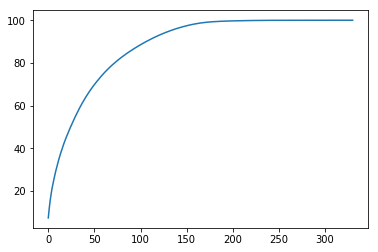

In [87]:
#plt.xlim(0,10)
  
plt.plot(cum_var_exp)

plt.show()

In [88]:
var_exp

[7.3696539594153805,
 4.386949172909521,
 3.639660899926528,
 2.9920160107280163,
 2.6269992067346277,
 2.240328675449723,
 2.0687853977936506,
 1.9435351653849537,
 1.9039054118480867,
 1.726128185416263,
 1.673054862931891,
 1.5671368818932476,
 1.5617833551226965,
 1.4298087072879462,
 1.333618040583529,
 1.3141091591940954,
 1.2842829340436985,
 1.2730144301616466,
 1.171883712988252,
 1.107407472798941,
 1.0936390872297614,
 1.0499231009092753,
 1.0444872737759574,
 1.027107016458248,
 1.013230250199409,
 0.9736900725081861,
 0.9595360378058988,
 0.9467499200569348,
 0.9403701691006711,
 0.9369238404343427,
 0.8865576511093003,
 0.8819983162564685,
 0.8746626633092058,
 0.8526367371552512,
 0.8408973222853997,
 0.8107529540988291,
 0.7936438567172697,
 0.7814490020454817,
 0.7395300905800515,
 0.7265592405147552,
 0.7207318372382965,
 0.7087818833864231,
 0.6917807467511351,
 0.6810704221237628,
 0.6415308162669591,
 0.6364083629109972,
 0.6279986781024678,
 0.6158995119211267,
 0

In [89]:
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents          )
principalDf

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-2.228632,-0.225502,1.054359,-1.753136,1.523325,-3.733344,-0.575013,3.238013,-1.515910,1.413317,...,0.679419,-4.420199,2.342226,-0.354446,0.717519,1.464321,-0.770169,-1.235434,1.120571,0.553516
1,0.198572,-0.418509,0.747010,-0.597729,-1.459099,-2.086072,0.792684,1.699474,-1.151380,0.350026,...,1.769388,-0.781215,4.192920,-1.975144,1.961256,-2.118444,-2.496168,0.895901,-1.163122,2.633713
2,0.880659,1.172860,1.720745,-2.145526,-1.123498,-3.928266,-0.638712,1.151044,1.015102,-1.165999,...,2.224836,-0.536435,1.214203,-1.557128,3.057256,-0.398830,-2.826065,0.295550,-2.021738,-0.291951
3,0.779676,1.612231,1.977574,-0.871087,-2.516272,-4.282411,2.684333,-2.516807,3.887722,-0.669589,...,1.604468,2.058796,0.870950,-0.708968,0.585294,0.021249,-3.033650,-3.006579,-1.312132,-1.854173
4,2.319189,2.361887,2.076521,-3.027431,-4.306545,-1.131908,2.981327,-0.920308,0.661676,-0.709515,...,0.857718,1.353623,1.615995,-1.399080,-0.877330,-1.336813,0.357260,-2.179963,-1.524068,1.089527
5,-1.659593,4.044817,1.493896,-2.241214,0.558897,-5.285796,-1.582636,0.962329,0.183368,0.531538,...,0.015177,0.857137,-1.884059,1.304912,-1.412476,-1.169743,-1.957181,-0.041461,0.164523,0.316391
6,1.567517,0.890069,2.831583,-3.484348,-2.054879,-1.491749,4.296947,-0.177435,0.436132,5.189802,...,2.741896,-2.033028,-1.528352,-3.438748,1.765864,0.064175,-0.249368,0.092286,-1.448121,-3.641406
7,0.210908,18.231086,-0.602492,2.092540,-1.847036,-0.673821,5.444246,-1.346384,-1.615730,0.051247,...,0.917656,0.829941,3.107803,-2.337116,-1.527771,-0.205006,1.589727,-2.033796,0.277781,0.669896
8,1.608993,3.174678,3.412734,-4.970254,-3.449852,-1.549526,4.856899,2.995144,1.173150,2.166274,...,1.301990,-0.692066,1.275104,-2.475656,0.126424,-1.060160,0.526888,-1.232056,-2.264823,-0.729199
9,-1.504853,22.338718,-2.048831,4.606633,2.909502,2.905747,2.454619,-0.212579,-4.343753,0.024922,...,-1.262805,-0.329895,1.435199,-3.927655,4.188655,-3.866894,-1.341800,-3.766412,-2.022178,-0.770081


In [90]:
hedef_fail=hedef_fail.reset_index(drop=True)

In [91]:
float_final_df = pd.concat([principalDf,hedef_fail], axis = 1)

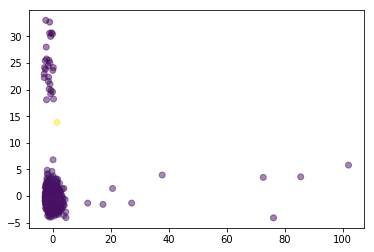

In [92]:
N = 50
x = float_final_df.iloc[:,0]
y = float_final_df.iloc[:,1]
colors = float_final_df.iloc[:,2]

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [93]:
a=pca.explained_variance_ratio_

In [94]:
np.sum(a)

0.4980858348804808

In [95]:
float_logistic=pd.concat([hedef_fail,float_final_df], axis = 1)

In [96]:
float_final_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Fail
0,-2.228632,-0.225502,1.054359,-1.753136,1.523325,-3.733344,-0.575013,3.238013,-1.515910,1.413317,...,-4.420199,2.342226,-0.354446,0.717519,1.464321,-0.770169,-1.235434,1.120571,0.553516,0
1,0.198572,-0.418509,0.747010,-0.597729,-1.459099,-2.086072,0.792684,1.699474,-1.151380,0.350026,...,-0.781215,4.192920,-1.975144,1.961256,-2.118444,-2.496168,0.895901,-1.163122,2.633713,1
2,0.880659,1.172860,1.720745,-2.145526,-1.123498,-3.928266,-0.638712,1.151044,1.015102,-1.165999,...,-0.536435,1.214203,-1.557128,3.057256,-0.398830,-2.826065,0.295550,-2.021738,-0.291951,0
3,0.779676,1.612231,1.977574,-0.871087,-2.516272,-4.282411,2.684333,-2.516807,3.887722,-0.669589,...,2.058796,0.870950,-0.708968,0.585294,0.021249,-3.033650,-3.006579,-1.312132,-1.854173,0
4,2.319189,2.361887,2.076521,-3.027431,-4.306545,-1.131908,2.981327,-0.920308,0.661676,-0.709515,...,1.353623,1.615995,-1.399080,-0.877330,-1.336813,0.357260,-2.179963,-1.524068,1.089527,0
5,-1.659593,4.044817,1.493896,-2.241214,0.558897,-5.285796,-1.582636,0.962329,0.183368,0.531538,...,0.857137,-1.884059,1.304912,-1.412476,-1.169743,-1.957181,-0.041461,0.164523,0.316391,0
6,1.567517,0.890069,2.831583,-3.484348,-2.054879,-1.491749,4.296947,-0.177435,0.436132,5.189802,...,-2.033028,-1.528352,-3.438748,1.765864,0.064175,-0.249368,0.092286,-1.448121,-3.641406,0
7,0.210908,18.231086,-0.602492,2.092540,-1.847036,-0.673821,5.444246,-1.346384,-1.615730,0.051247,...,0.829941,3.107803,-2.337116,-1.527771,-0.205006,1.589727,-2.033796,0.277781,0.669896,0
8,1.608993,3.174678,3.412734,-4.970254,-3.449852,-1.549526,4.856899,2.995144,1.173150,2.166274,...,-0.692066,1.275104,-2.475656,0.126424,-1.060160,0.526888,-1.232056,-2.264823,-0.729199,0
9,-1.504853,22.338718,-2.048831,4.606633,2.909502,2.905747,2.454619,-0.212579,-4.343753,0.024922,...,-0.329895,1.435199,-3.927655,4.188655,-3.866894,-1.341800,-3.766412,-2.022178,-0.770081,1


In [97]:
y= float_final_df.Fail
x=float_final_df.iloc[:,0:25]

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [99]:
logistic = LogisticRegression(random_state = 0)


In [100]:
model = logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)

In [101]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(0,0.5,'Predictions')

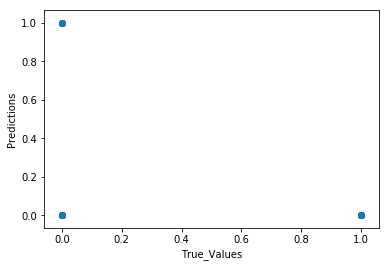

In [102]:
plt.scatter(y_test, y_pred)
plt.xlabel("True_Values")
plt.ylabel("Predictions")

In [103]:
print ("Eküriy Sıkor: ", model.score(x_test, y_test))

Eküriy Sıkor:  0.9025787965616046


In [104]:
model.coef_

array([[ 0.00107586,  0.0948159 ,  0.0364106 , -0.01290843,  0.09049649,
         0.02055832,  0.0783824 ,  0.08479828,  0.03911086, -0.10340745,
        -0.12707745, -0.08410485,  0.03499282,  0.05693497, -0.10732433,
         0.064074  , -0.01474721, -0.00459701, -0.14682316, -0.16341724,
         0.00595962,  0.0052594 ,  0.02129309, -0.06593088, -0.00096383]])

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[315   4]
 [ 30   0]]


In [106]:
zx=pd.DataFrame(y_test)

In [108]:
zxx=pd.DataFrame(y_train)

In [109]:
zxx['Fail'].value_counts()

0    975
1     69
Name: Fail, dtype: int64